<a href="https://colab.research.google.com/github/dantrica/Electrostatics/blob/master/Vectores_campo_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulador de campos eléctricos**

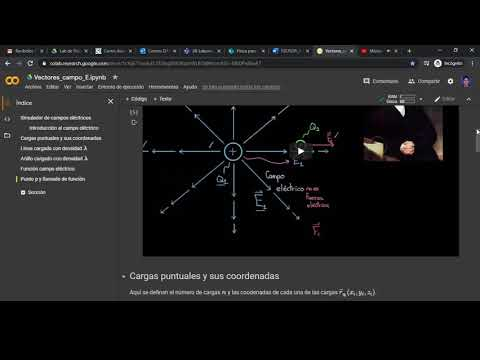

In [16]:
#@title Introducción al campo eléctrico { display-mode: "form" }
#-*- coding: utf-8 -*-
"""
Created on Tue Mar 31 09:02:47 2020
@author: Silvi
version for python 3
"""
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#@markdown En este video veras una introducción al concepto de campo eléctrico:
from IPython.display import YouTubeVideo
YouTubeVideo('xYfYhRtVhek', width=900, height=600)

# Cargas puntuales y sus coordenadas

Aquí se definen el número de cargas $n$ y las coodenadas de cada una de las cargas $\vec{r}_{q_i}(x_i, y_i, z_i)$.

In [6]:
# Numero de cargas
cord = 'x', 'y', 'z'
nc = int(input('Ingrese el numero de cargas n = '))
if nc < 1:
  print('¡mensaje de error! \n1 es el mínimo número de cargas para producir campo eléctrico')
#Coodenadas de las cargas eléctricas
j = 0
q = np.zeros(nc)
rq = np.zeros((nc, 3))
while j < nc:
  #input individual charge value
  q[j] = float(input("Ingrese el valor de la carga "+str(j+1)+" en Coulomb = "))
  #spatial position of charges
  rq[j] = np.array([float(input(r'Ingrese coordenada ' +cord[l]+ ' de la carga '+str(j+1)+' = ')) for l in range(3)])
  j += 1
print('q = ', q)
print('rq', rq)

Ingrese el numero de cargas n = 2
Ingrese el valor de la carga 1 en Coulomb = 1e-6
Ingrese coordenada x de la carga 1 = 1
Ingrese coordenada y de la carga 1 = 0
Ingrese coordenada z de la carga 1 = 0
Ingrese el valor de la carga 2 en Coulomb = -1e-6
Ingrese coordenada x de la carga 2 = 0
Ingrese coordenada y de la carga 2 = -1
Ingrese coordenada z de la carga 2 = 0
q =  [ 1.e-06 -1.e-06]
rq [[ 1.  0.  0.]
 [ 0. -1.  0.]]


# Linea cargada con densidad $\lambda$

In [0]:
# Longitud de la distribución lineal en [m]
L = 2.0
# Densidad lineal de carga en [C/m] 
ld = 1e-6
# número de cargas para recosntruir la distribución lineal
nc = 100
v = 0
dL = float(L)/(nc-1)
qo = ld*L/nc
rq = np.zeros((nc, 3))
q = np.zeros(nc)
while v < nc:
  q[v] = qo
  rq[v] = np.array([v*dL-L/2, 0, 0])
  v += 1

# Anillo cargado con densidad $\lambda$

In [0]:
# Radio del anillo en [m]
R = 1
# Densidad lineal de carga en [C/m]
ld = 1e-6
# número de cargas para recosntruir la distribución lineal
nc = 100
s = 0
p = 2*np.pi*R
qo = ld*p/nc
rq = np.zeros((nc, 3))
q = np.zeros(nc)
while s < nc:
  phi = s*2*np.pi/nc
  q[s] = qo
  rq[s] = R*np.array([np.cos(phi), np.sin(phi), 0])
  s += 1

# Función campo eléctrico

Se define el método ``` charges(rp, n, ...) ``` para determinar el campo eléctrico en un punto $p$ produciodo por un conjunto $n$ de cargas puntuales.

## $\vec{E}_p=\sum_{n=1}^i\frac{q_i}{4\pi \epsilon_0 r_i^2}\hat{r_i}$
---
---
Para profundizar en la métodología usada para desarrollar esta librería se recomienda la lectura del siguiente trabajo: [python script ...](https://iopscience.iop.org/article/10.1088/1742-6596/1247/1/012044/meta)

In [0]:
def charges(rp, n, qq, rqq, ke=9e9):
    i = 0
    q = qq
    rq = rqq
    ri = np.zeros((n, 3))
    mag_ri = np.zeros(n)
    uni_ri = np.zeros((n, 3))
    vec_E = np.zeros((n, 3))
    mag_Ep = 0.0
    vec_Ep = [0,0,0]
    if n < 1:
        print('¡mensaje de error! \n1 es el mínimo número de cargas para producir campo eléctrico')
    else:
        fig = plt.figure(figsize=(20, 16))
        ax = fig.gca(projection='3d')
        ax.scatter3D(rp[0], rp[1], rp[2], c='k', s=50)
        ax.quiver3D([0], [0], [0], rp[0], rp[1], rp[2], pivot='tail', length = 1.0, arrow_length_ratio=0.3, color='g')
        while i < n:
            if (len(q)<20):
              ax.quiver3D([0], [0], [0], rq[i][0], rq[i][1], rq[i][2], pivot='tail', length = 1.0, arrow_length_ratio=0.3) #length = np.sqrt(rq[i][0]**2+rq[i][1]**2+rq[i][2]**2)
            if q[i]>0:
                co = 'r' #carga positiva
            else:
                co = 'b' #carga negativa
            ax.scatter3D(rq[i][0], rq[i][1], rq[i][2], c=co, s=200)
            ri[i] = rp - rq[i]
            mag_ri[i] = np.sqrt(sum(ri[i]**2))
            if (len(q)<20):
              ax.quiver3D(rq[i][0], rq[i][1], rq[i][2], ri[i][0], ri[i][1], ri[i][2], pivot='tail', length = 1.0, arrow_length_ratio=0.3, color='m') #length = mag_ri[i]
            uni_ri[i] = ri[i]/mag_ri[i]
            vec_E[i] = (ke*q[i]/mag_ri[i]**2)*uni_ri[i]
            i += 1
        vec_Ep = np.array([sum(vec_E[:,0]), sum(vec_E[:,1]), sum(vec_E[:,2])])
        ax.quiver3D(rp[0], rp[1], rp[2], vec_Ep[0], vec_Ep[1], vec_Ep[2], pivot='tail', length = 1, color='c', arrow_length_ratio=0.3, normalize=True)
        mag_Ep = np.sqrt(sum(vec_Ep**2))
        
        mag_rp = np.sqrt(rp[0]**2+rp[1]**2+rp[2]**2)
        arrows = np.array([[0, 0, 0, 2*mag_rp, 0, 0], [0, 0, 0, 0, 2*mag_rp, 0], [0, 0, 0, 0, 0, 2*mag_rp]])
        X, Y, Z, U, V, W = zip(*arrows)

        ax.quiver3D(X, Y, Z, U, V, W, pivot='tail', length = 1.0, color='k', arrow_length_ratio=0.3) #length = 2*mag_rp
        ax.set_xlim([-rq.max()-rp.max(), rq.max()+rp.max()])
        ax.set_ylim([-rq.max()-rp.max(), rq.max()+rp.max()])
        ax.set_zlim([-rq.max()-rp.max(), rq.max()+rp.max()])
        ax.set_xlabel('x [m]', fontsize=30)
        ax.set_ylabel('y [m]', fontsize=30)
        ax.set_zlabel('z [m]', fontsize=30)
        ax.set_title('Charge positions', fontsize=30)
        #ax.set_title('$E_p = $'+str(vec_Ep[0])+' $i$ +'+str(vec_Ep[1])+' $j$ +'+str(vec_Ep[2])+' $k$'+str( )+' $[V/m]$')
        plt.show()
    return q, rq, ri, mag_ri, uni_ri, vec_E, vec_Ep, mag_Ep

# Punto p y llamado de función

En esta celda se define el vector $\vec{r}_p(x_p, y_p, z_p)$ donde se determinará el campo eléctrico y se realiza el llamado a la función charges().

Ingrese el vector al punto p, coordenada x en [m] = 0
Ingrese el vector al punto p, coordenada y en [m] = 0
Ingrese el vector al punto p, coordenada z en [m] = 1


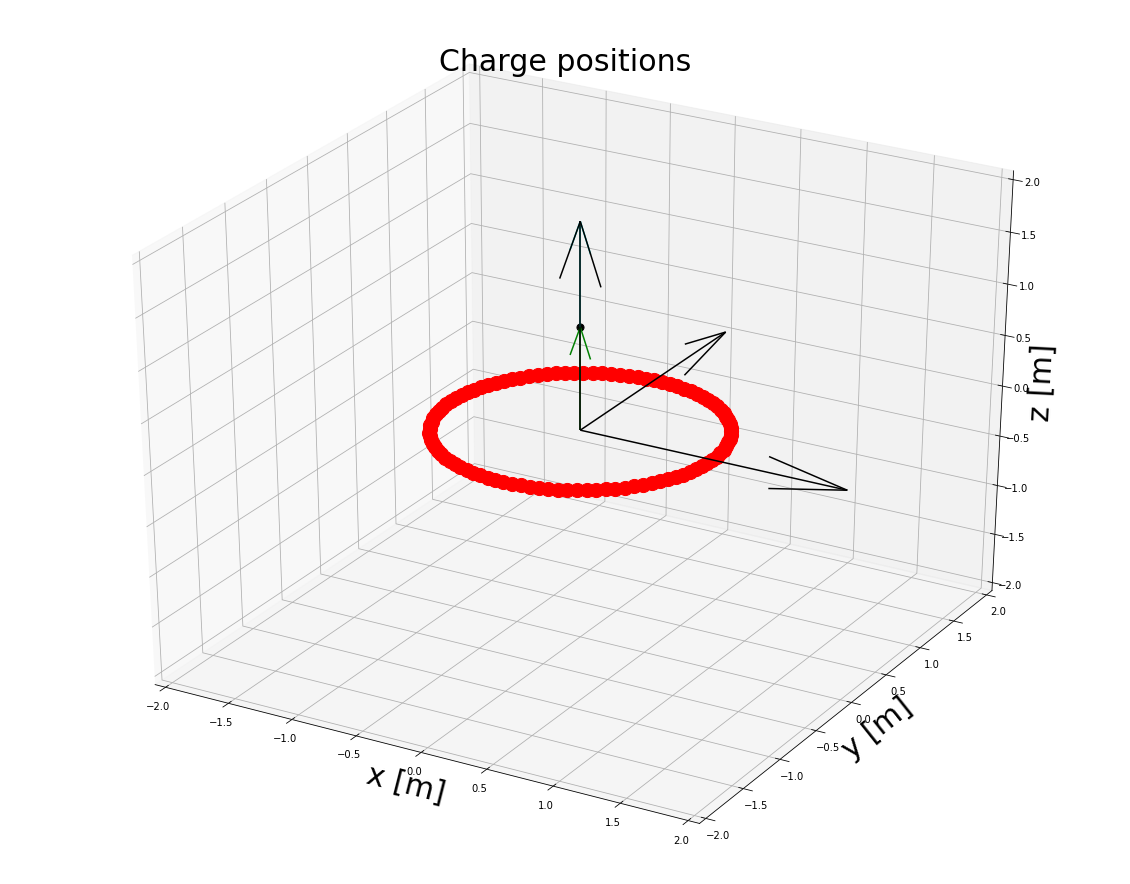


 Ep = 5.968558980384842e-13 i +-3.552713678800501e-15 j +19992.97322171261 k [V/m]

 Ep = 19992.97322171261 [V/m]


In [13]:
# Punto donde se desea calcular el campo eléctrico
rp = np.array([float(input("Ingrese el vector al punto p, coordenada " +cord[l]+ " en [m] = ")) for l in range(3)])
#Llamado de la función charges
q, rq, ri, mag_ri, uni_ri, vec_E, vec_Ep, mag_Ep = charges(rp=rp, n=nc, qq=q, rqq=rq)
print('\n', 'Ep = '+str(vec_Ep[0])+' i +'+str(vec_Ep[1])+' j +'+str(vec_Ep[2])+' k'+str( )+' [V/m]')
print('\n', 'Ep = '+ str(mag_Ep) + ' [V/m]')